In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Library visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ9IyDEvqv-_qSnKqOmQ-5tCiufOmFdlTEDq1H4w7-mnPfxv1Ka_1MIb6zuBY1KCZGLMr-JkMUHgFrC/pub?output=csv')
df.head()

,transaction_id,customer_id,transaction_date,product_id,price_x,qty,total_amount,store_id,age,gender,marital_status,income,product_name,price_y,store_name,group_store,type,latitude,longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.99093,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,10000,Prima Tendean,Prima,Modern Trade,-6.20000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,8800,Gita Ginara,Gita,General Trade,-6.96667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,8800,Gita Ginara,Gita,General Trade,-6.96667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,10000,Gita Ginara,Gita,General Trade,-6.96667,110.416664


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    5020 non-null   object 
 1   customer_id       5020 non-null   int64  
 2   transaction_date  5020 non-null   object 
 3   product_id        5020 non-null   object 
 4   price_x           5020 non-null   int64  
 5   qty               5020 non-null   int64  
 6   total_amount      5020 non-null   int64  
 7   store_id          5020 non-null   int64  
 8   age               5020 non-null   int64  
 9   gender            5020 non-null   int64  
 10  marital_status    4976 non-null   object 
 11  income            5020 non-null   float64
 12  product_name      5020 non-null   object 
 13  price_y           5020 non-null   int64  
 14  store_name        5020 non-null   object 
 15  group_store       5020 non-null   object 
 16  type              5020 non-null   object 


### **Insights from the Dataset**
1. **Data Quality & Cleaning Needs**:
   - The column **"marital_status"** has 4976 non-null values out of 5020, indicating missing values that need handling.
   - There are two price columns (**"price_x"** and **"price_y"**) that need to be examined for redundancy or inconsistency.

2. **Feature Addition: Revenue**
   - A new feature **"revenue"** has been added, calculated as:  
   revenue = price_x * qty
   
   - This will help in analyzing store, product, and customer profitability.

3. **Customer Demographics**:
   - Customers' **age** varies from young to older individuals, allowing segmentation analysis.
   - **Gender** is encoded as 0 and 1 but lacks clarity (assumed: 0 = Female, 1 = Male).
   - **Marital status** could influence purchasing behavior, but missing values should be imputed.

4. **Transaction Trends**:
   - The **"transaction_date"** column is stored as an object and should be converted to datetime for trend analysis.
   - **Revenue, total sales (total_amount), and quantity sold (qty)** allow deeper financial analysis per product/store.
   - Different store types (**"General Trade" vs. "Modern Trade"**) might impact sales performance.

5. **Product & Store Analysis**:
   - **Top-selling products** can be identified using `revenue` instead of just `total_amount` or `qty`.
   - **Performance per store/group_store** should be analyzed to see which stores contribute the most to total revenue.
   - **Price consistency**: Checking if `price_x` and `price_y` match across transactions.

---

### **Next Steps**
#### **1. Data Cleaning**
- Convert **"transaction_date"** to datetime format.
- Handle missing values in **"marital_status"** (impute or drop).
- Verify if **"price_x"** and **"price_y"** are redundant or inconsistent.

#### **2. Exploratory Data Analysis (EDA)**
- Analyze **sales and revenue trends over time** (daily/monthly performance).
- Identify **top-selling products** based on `revenue` and `qty`.
- Segment customers based on **age, gender, income, and spending habits**.
- Compare **sales and revenue performance between store types** (General vs. Modern Trade).
- Analyze **store contribution to total revenue**.

#### **3. Business Insights**
- Identify **customer purchase patterns** (e.g., frequently bought products).
- Determine **peak sales and revenue periods** to optimize inventory and promotions.
- Evaluate if certain **customer segments contribute more revenue**.
- Assess **store performance** to optimize stocking strategies and promotions.

#### **4. Advanced Analysis**
- **Customer Segmentation**: Cluster customers based on spending behavior and revenue contribution.
- **Market Basket Analysis**: Find product associations (e.g., which products are frequently bought together).
- **Sales & Revenue Forecasting**: Predict future revenue trends using time series modeling.

Would you like me to proceed with any specific analysis now? 🚀

In [4]:
df.describe()

,customer_id,price_x,qty,total_amount,store_id,age,gender,income,price_y,latitude,longitude
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841,40.003586,0.452988,8.623713,9684.800797,-2.602685,109.600789
std,129.672955,4600.708780,1.855295,19675.462455,4.028502,12.834719,0.497835,6.518242,4600.708780,4.750422,8.357593
min,1.000000,3200.000000,1.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,3200.000000,-7.797070,95.323753
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000,30.000000,0.000000,4.220000,4200.000000,-6.914860,104.756554
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000,39.000000,0.000000,7.720000,9400.000000,-5.135400,110.370529
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000,51.000000,1.000000,10.780000,15000.000000,3.316690,114.590111
max,447.000000,18000.000000,10.000000,88000.000000,14.000000,72.000000,1.000000,71.300000,18000.000000,5.548290,128.190643


In [5]:
df.describe(include='object')

,transaction_id,transaction_date,product_id,marital_status,product_name,store_name,group_store,type
count,5020,5020,5020,4976,5020,5020,5020,5020
unique,4908,365,10,2,10,12,7,2
top,TR71313,2022-03-02,P5,Married,Thai Tea,Lingga,Prima,General Trade
freq,3,31,814,3779,814,738,1085,2851


# Data Preprocessing

## Missing Values Check

In [6]:
# Step 1: Check Missing Values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a DataFrame for better visualization
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Show result
print("Step 1: Missing Values in Each Column")
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False))


Step 1: Missing Values in Each Column
                Missing Values  Percentage (%)
marital_status              44        0.876494


Step 2: Handle Missing Values Based on Rules
Since the "marital_status" column has only 0.88% missing values (less than 5%), we will impute it with the mode (most frequent value) according to the missing values handling policy.
Missing Values Handling:

- Columns with <5% missing: Imputed using median.
- Columns with 5-20% missing: Imputed using median values.
- Columns with >20% missing: Dropped

In [7]:
# Handle missing values based on percentage
if missing_percentage['marital_status'] < 5:
    df['marital_status'].fillna(df['marital_status'].mode()[0], inplace=True)  # Impute with mode

# Show result after imputation
print("Step 2: Missing Values After Handling")
print(df['marital_status'].isna().sum())  # Should be 0 after imputation
print(df[['marital_status']].head())  # Display first few rows


Step 2: Missing Values After Handling
0
  marital_status
0        Married
1        Married
2         Single
3        Married
4        Married


## Convert "transaction_date" to datetime format

In [8]:
# Convert "transaction_date" to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Show result
print("Step 3: Data Type of 'transaction_date'")
print(df.dtypes['transaction_date'])  # Should show datetime64[ns]
print(df[['transaction_date']].head())  # Display first few rows


Step 3: Data Type of 'transaction_date'
datetime64[ns]
  transaction_date
0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01


In [9]:
# Get unique values of the 'age' column
unique_ages = df['age'].unique()

# Print the unique ages
unique_ages


array([36, 44, 27, 48, 33, 19, 45, 49, 43, 34, 53, 35, 29, 58, 47, 37, 32,
       20, 30, 41, 59, 38, 31, 52, 24, 28, 61, 57, 51, 40, 55, 54, 18, 46,
       39, 72, 22, 21,  3, 50,  2, 26, 23, 25, 62, 42, 56, 60, 68, 65,  0,
       66, 69, 70])

In [10]:
# Calculate the mode of the 'age' column (excluding 0 and 2 values)
mode_age = df[~df['age'].isin([0, 2, 3])]['age'].mode()[0]

# Replace age = 0 and age = 2 with the mode value
df['age'] = df['age'].replace([0, 2, 3], mode_age)

# Display the updated age statistics
df['age'].describe()


,age
count,5020.000000
mean,40.271514
std,12.478049
min,18.000000
25%,31.000000
50%,39.000000
75%,51.000000
max,72.000000


In [11]:
# Check if "price_x" and "price_y" are redundant
if (df["price_x"] == df["price_y"]).all():
    df.drop(columns=["price_y"], inplace=True)
    print("Dropped 'price_y' as it is redundant.")
else:
    print("Prices are inconsistent; both columns are kept.")

Dropped 'price_y' as it is redundant.


In [12]:
# Rename the remaining price column to "price"
df.rename(columns={"price_x": "price"}, inplace=True)

# Display updated dataframe structure
df.head()

,transaction_id,customer_id,transaction_date,product_id,price,qty,total_amount,store_id,age,gender,marital_status,income,product_name,store_name,group_store,type,latitude,longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.99093,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.20000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.96667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.96667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.96667,110.416664


In [13]:
# Simpan dataset yang telah diperbarui ke dalam file Excel
df.to_excel("Kalbe Farma Clean.xlsx", index=False, engine='openpyxl')

# Beri tahu pengguna bahwa file telah disimpan
print("File 'Kalbe Farma Clean.xlsx' berhasil disimpan.")

File 'Kalbe Farma Clean.xlsx' berhasil disimpan.


# EDA

## Univariate Analysis

In [14]:
# Define a custom color palette
custom_palette = ["#006400", "#000000", "#FFFFFF"]  # Dark Green, Black, White

# Apply the custom theme to seaborn
sns.set_style("whitegrid")
sns.set_palette([custom_palette[0]])

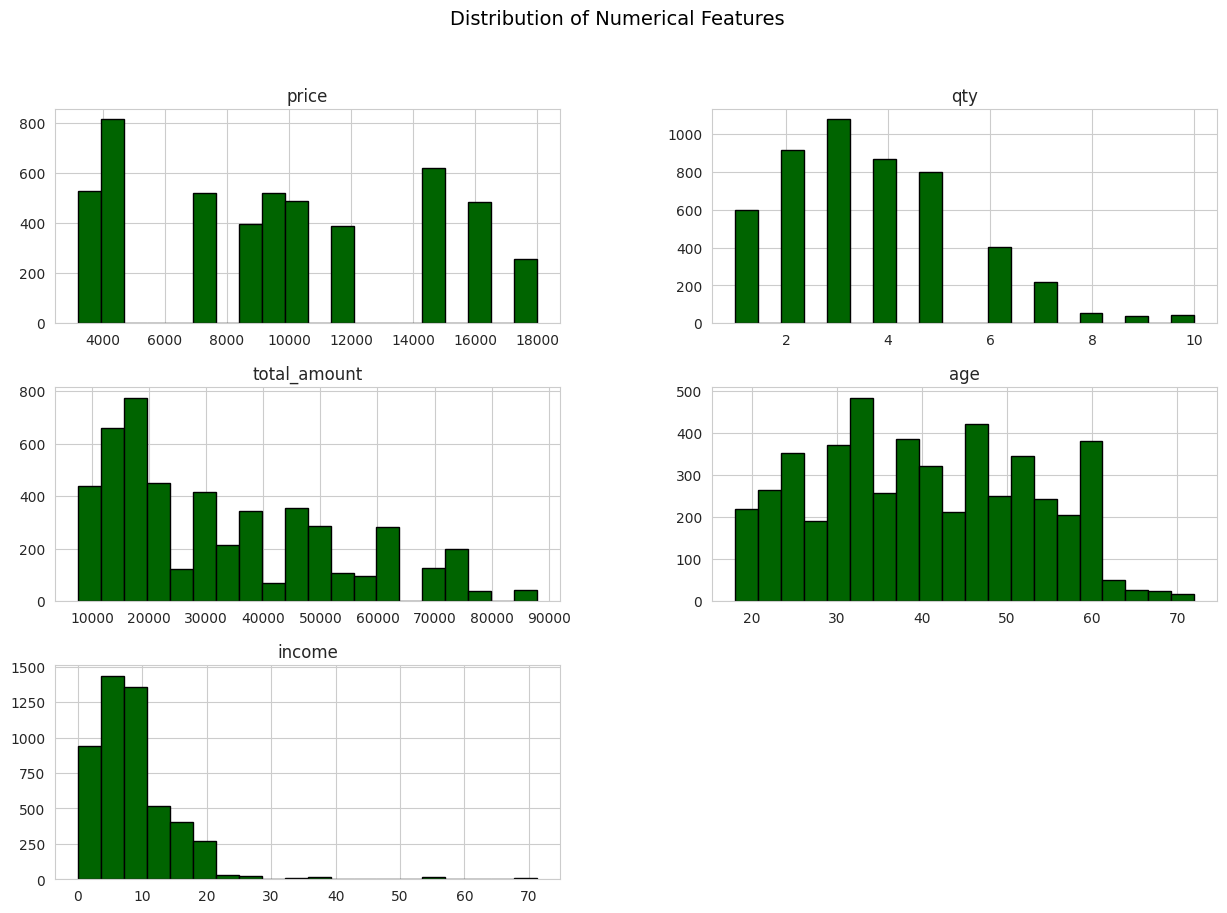

In [15]:
# 1. Distribution of numerical features
num_features = ['price', 'qty', 'total_amount', 'age', 'income']
df[num_features].hist(bins=20, figsize=(15, 10), edgecolor='black', color=custom_palette[0])
plt.suptitle("Distribution of Numerical Features", fontsize=14, color=custom_palette[1])
plt.show()

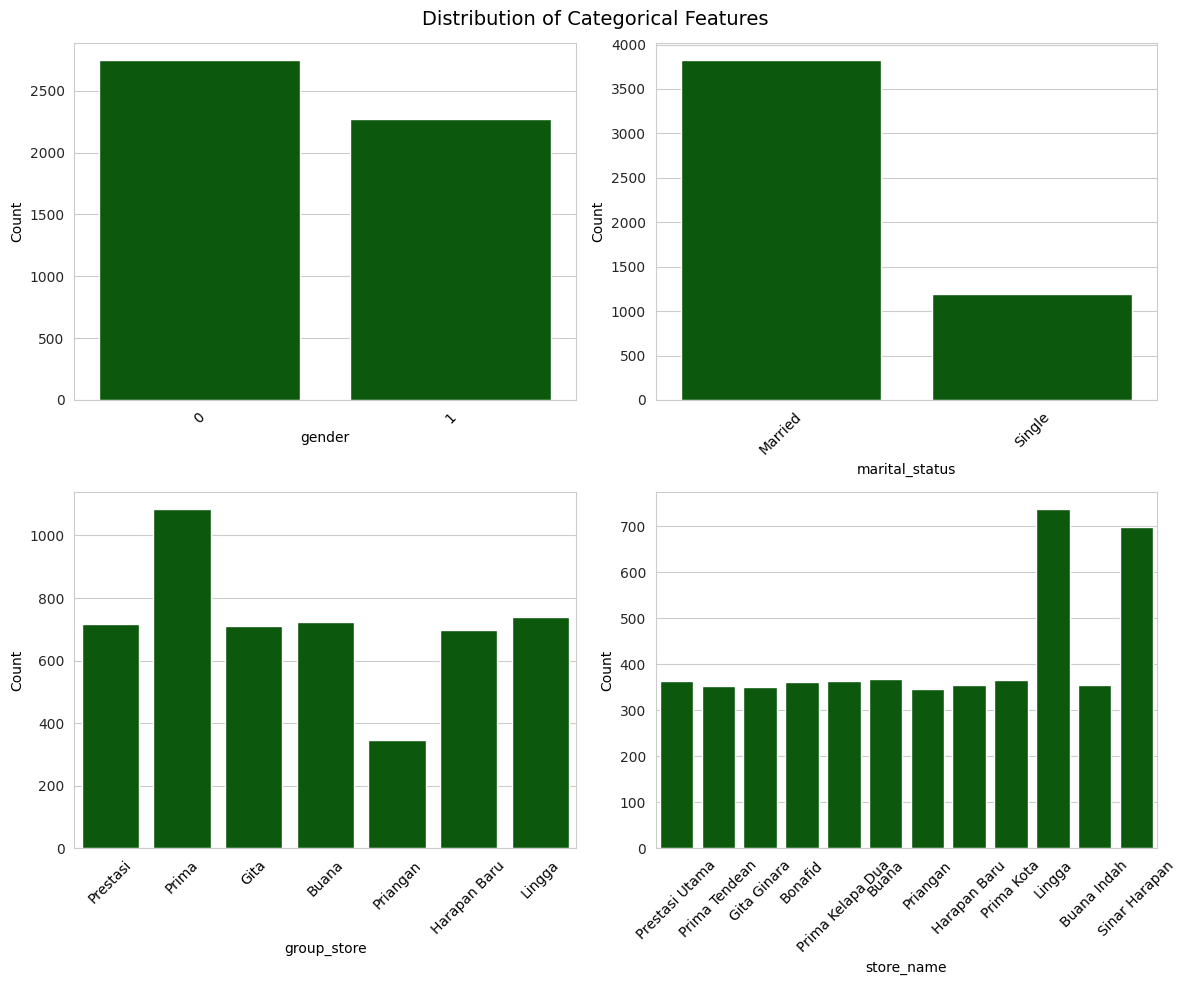

In [16]:
# 2. Count plots for categorical features
cat_features = ['gender', 'marital_status', 'group_store', 'store_name', 'type']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribution of Categorical Features", fontsize=14, color=custom_palette[1])

for ax, feature in zip(axes.flatten(), cat_features):
    sns.countplot(data=df, x=feature, ax=ax, palette=[custom_palette[0]])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, color=custom_palette[1])
    ax.set_xlabel(feature, color=custom_palette[1])
    ax.set_ylabel("Count", color=custom_palette[1])

plt.tight_layout()
plt.show()

## Bivariate Analysis

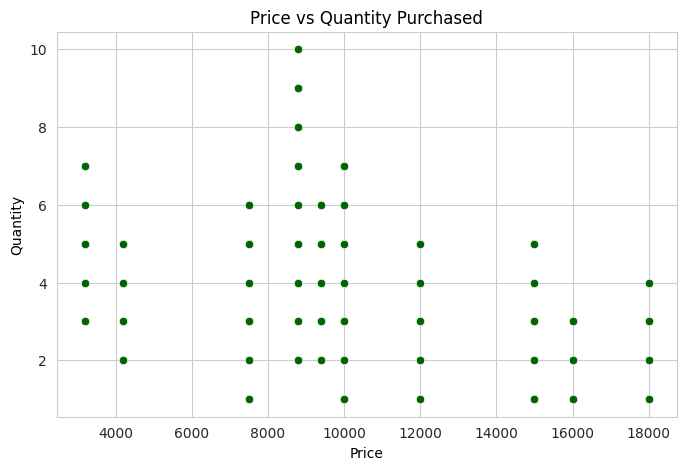

In [17]:
# 1. Price vs Quantity Purchased
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['price'], y=df['qty'], color=custom_palette[0])
plt.title("Price vs Quantity Purchased", color=custom_palette[1])
plt.xlabel("Price", color=custom_palette[1])
plt.ylabel("Quantity", color=custom_palette[1])
plt.show()

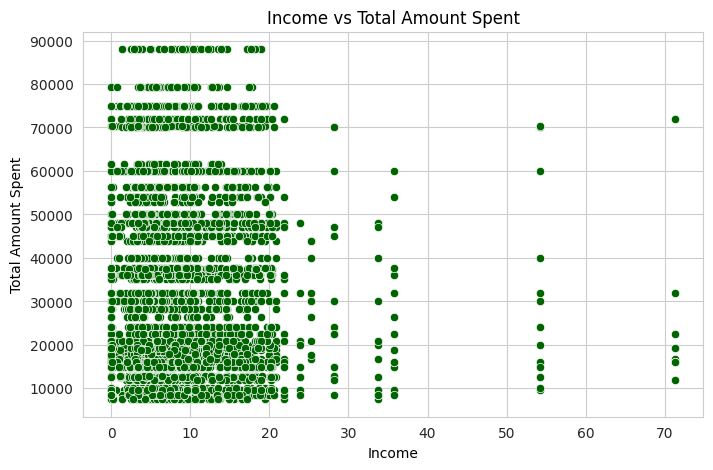

In [18]:
# 2. Income vs Total Amount Spent
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['income'], y=df['total_amount'], color=custom_palette[0])
plt.title("Income vs Total Amount Spent", color=custom_palette[1])
plt.xlabel("Income", color=custom_palette[1])
plt.ylabel("Total Amount Spent", color=custom_palette[1])
plt.show()

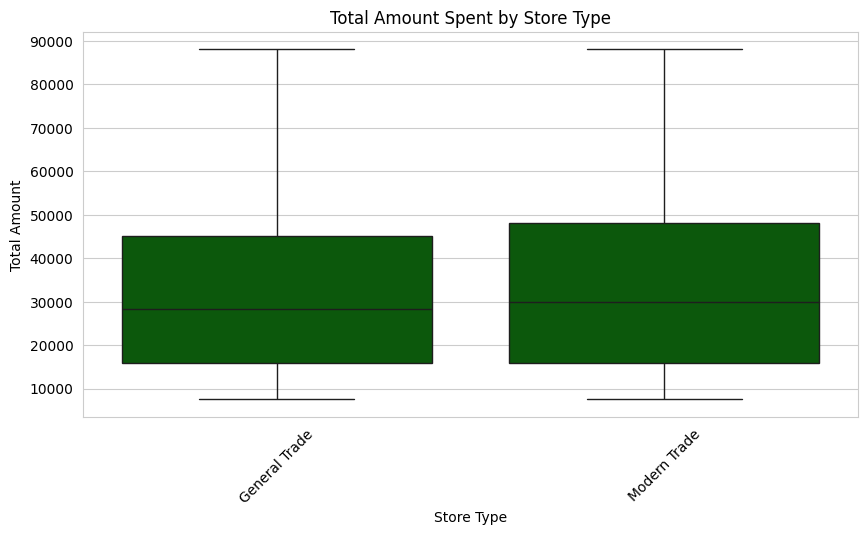

In [19]:
# 3. Boxplot of Total Amount by Store Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='total_amount', data=df, palette=[custom_palette[0]])
plt.title("Total Amount Spent by Store Type", color=custom_palette[1])
plt.xticks(rotation=45, color=custom_palette[1])
plt.yticks(color=custom_palette[1])
plt.xlabel("Store Type", color=custom_palette[1])
plt.ylabel("Total Amount", color=custom_palette[1])
plt.show()

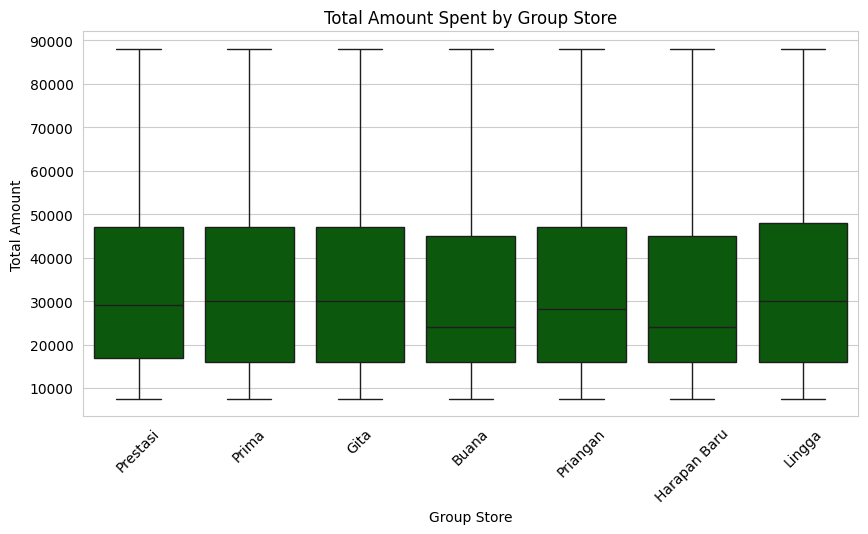

In [20]:
# 4. Boxplot of Total Amount by Group Store
plt.figure(figsize=(10, 5))
sns.boxplot(x='group_store', y='total_amount', data=df, palette=[custom_palette[0]])
plt.title("Total Amount Spent by Group Store", color=custom_palette[1])
plt.xticks(rotation=45, color=custom_palette[1])
plt.yticks(color=custom_palette[1])
plt.xlabel("Group Store", color=custom_palette[1])
plt.ylabel("Total Amount", color=custom_palette[1])
plt.show()

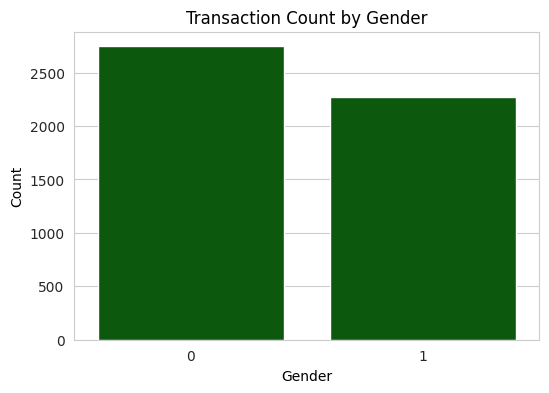

In [21]:
# 5. Count of Transactions by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="gender", palette=[custom_palette[0]])
plt.title("Transaction Count by Gender", color=custom_palette[1])
plt.xlabel("Gender", color=custom_palette[1])
plt.ylabel("Count", color=custom_palette[1])
plt.show()

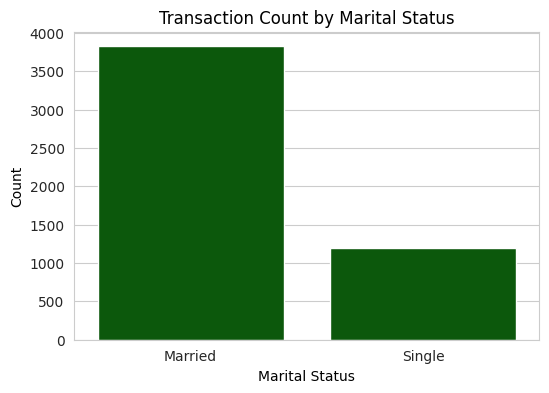

In [22]:
# 6. Count of Transactions by Marital Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="marital_status", palette=[custom_palette[0]])
plt.title("Transaction Count by Marital Status", color=custom_palette[1])
plt.xlabel("Marital Status", color=custom_palette[1])
plt.ylabel("Count", color=custom_palette[1])
plt.show()

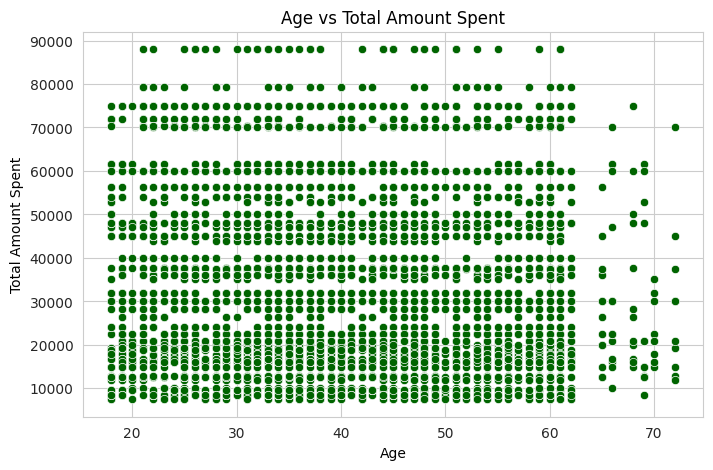

In [23]:
# 7. Relationship between Age and Total Amount Spent
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['total_amount'], color=custom_palette[0])
plt.title("Age vs Total Amount Spent", color=custom_palette[1])
plt.xlabel("Age", color=custom_palette[1])
plt.ylabel("Total Amount Spent", color=custom_palette[1])
plt.show()

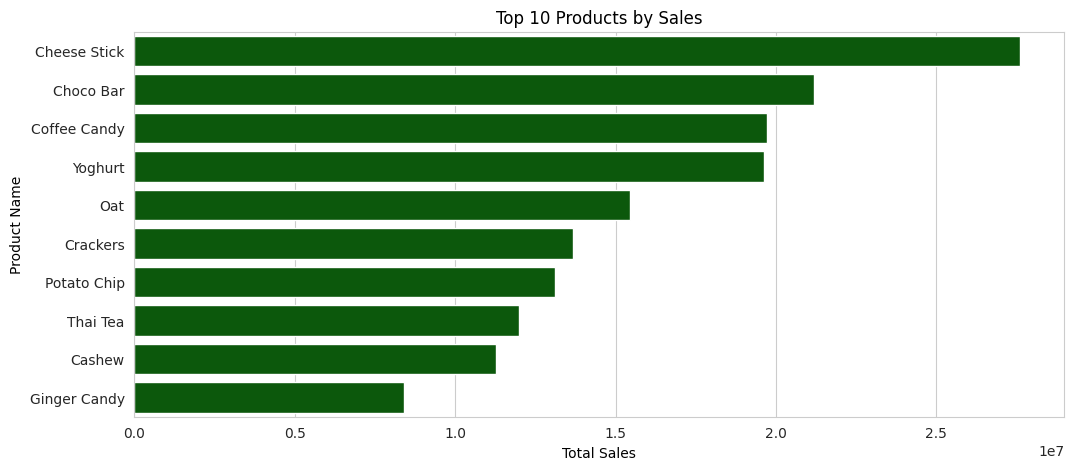

In [24]:
# 10. Relationship between Product and Total Sales
product_sales = df.groupby("product_name")["total_amount"].sum().reset_index().sort_values("total_amount", ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x="total_amount", y="product_name", data=product_sales[:10], palette=[custom_palette[0]])
plt.title("Top 10 Products by Sales", color=custom_palette[1])
plt.xlabel("Total Sales", color=custom_palette[1])
plt.ylabel("Product Name", color=custom_palette[1])
plt.show()

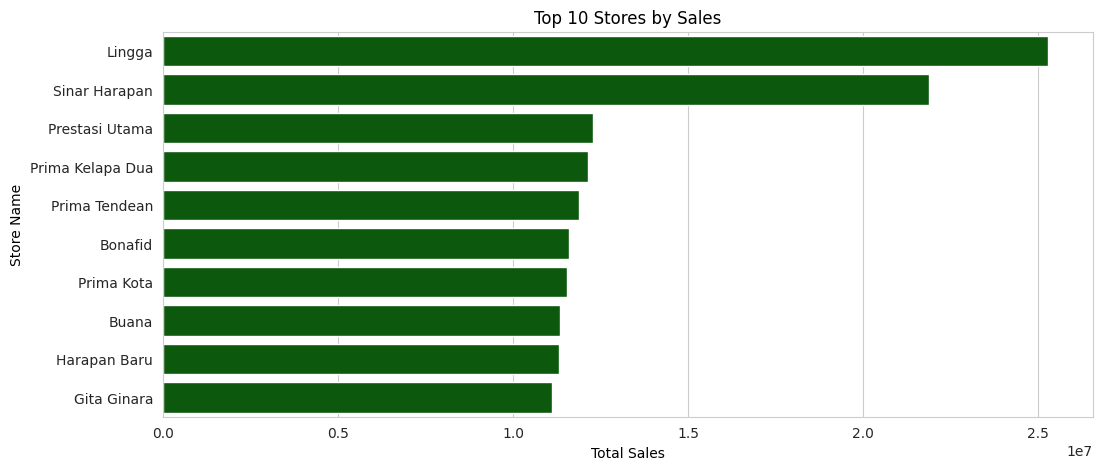

In [25]:
# 11. Relationship between Store Name and Total Sales
store_sales = df.groupby("store_name")["total_amount"].sum().reset_index().sort_values("total_amount", ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x="total_amount", y="store_name", data=store_sales[:10], palette=[custom_palette[0]])
plt.title("Top 10 Stores by Sales", color=custom_palette[1])
plt.xlabel("Total Sales", color=custom_palette[1])
plt.ylabel("Store Name", color=custom_palette[1])
plt.show()

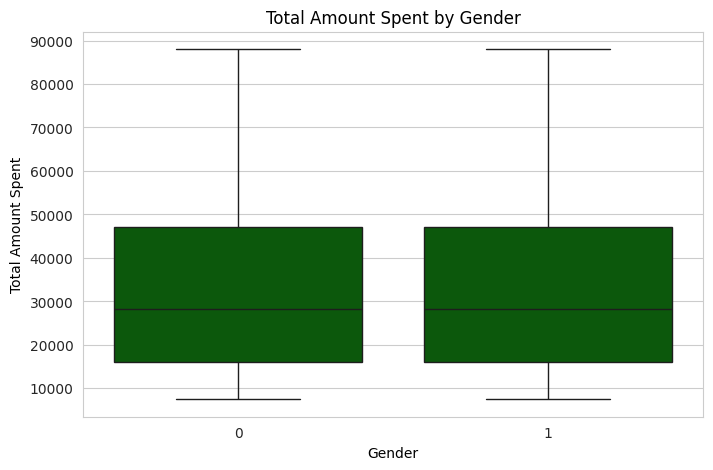

In [26]:
# 12. Relationship between Gender and Total Amount Spent
plt.figure(figsize=(8, 5))
sns.boxplot(x="gender", y="total_amount", data=df, palette=[custom_palette[0]])
plt.title("Total Amount Spent by Gender", color=custom_palette[1])
plt.xlabel("Gender", color=custom_palette[1])
plt.ylabel("Total Amount Spent", color=custom_palette[1])
plt.show()


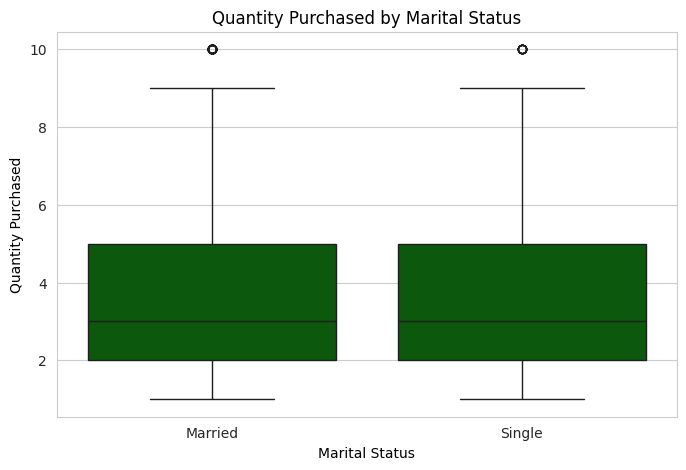

In [27]:
# 13. Relationship between Marital Status and Quantity Purchased
plt.figure(figsize=(8, 5))
sns.boxplot(x="marital_status", y="qty", data=df, palette=[custom_palette[0]])
plt.title("Quantity Purchased by Marital Status", color=custom_palette[1])
plt.xlabel("Marital Status", color=custom_palette[1])
plt.ylabel("Quantity Purchased", color=custom_palette[1])
plt.show()

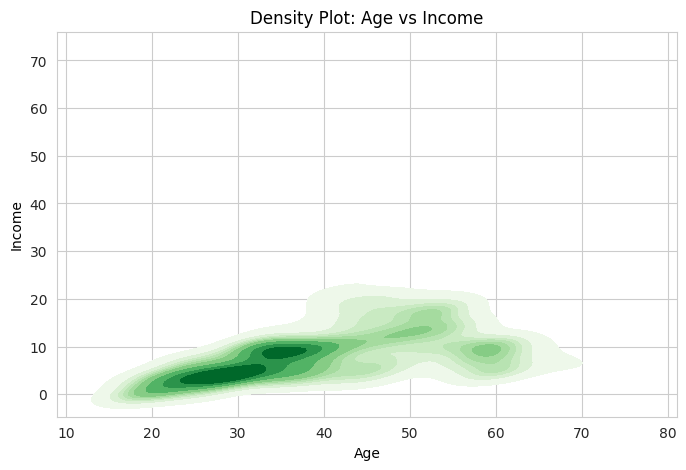

In [28]:
# 14. Relationship between Age and Income using KDE Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(x=df['age'], y=df['income'], fill=True, cmap="Greens")
plt.title("Density Plot: Age vs Income", color=custom_palette[1])
plt.xlabel("Age", color=custom_palette[1])
plt.ylabel("Income", color=custom_palette[1])
plt.show()

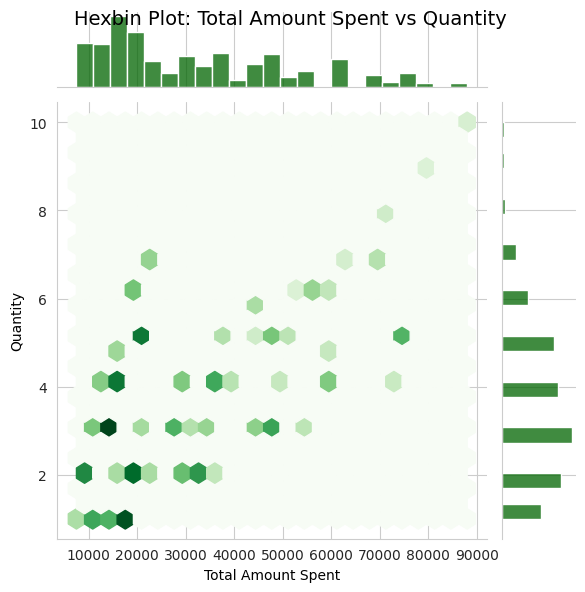

In [29]:
# 15. Plot Hexbin with better adjustments
g = sns.jointplot(
    x=df["total_amount"],
    y=df["qty"],
    kind="hex",
    cmap="Greens",
    marginal_kws={'color': custom_palette[0]}
)

g.fig.suptitle("Hexbin Plot: Total Amount Spent vs Quantity", color=custom_palette[1], fontsize=14)
plt.xlabel("Total Amount Spent", color=custom_palette[1])
plt.ylabel("Quantity", color=custom_palette[1])

plt.show()

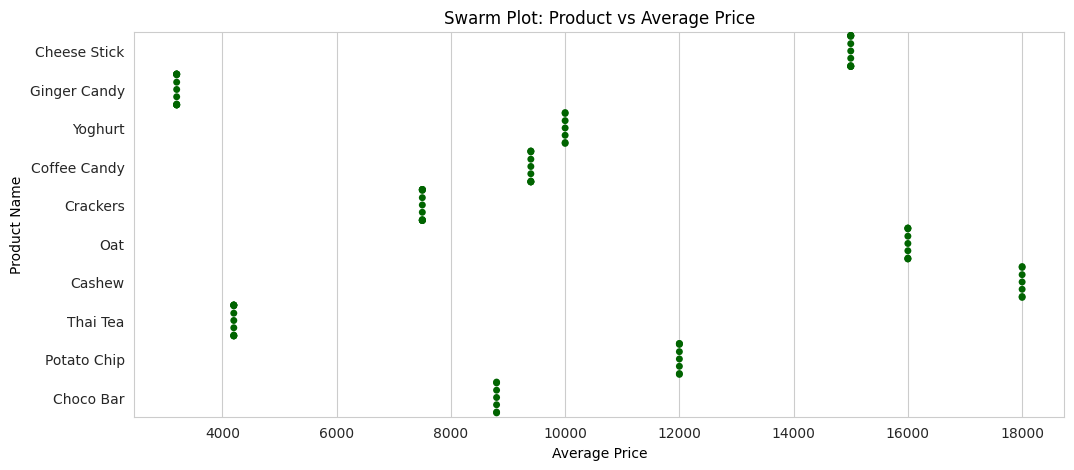

In [30]:
# 16. Relationship between Product and Average Price using Swarmplot
plt.figure(figsize=(12, 5))
sns.swarmplot(x="price", y="product_name", data=df.sample(100), palette=[custom_palette[0]])
plt.title("Swarm Plot: Product vs Average Price", color=custom_palette[1])
plt.xlabel("Average Price", color=custom_palette[1])
plt.ylabel("Product Name", color=custom_palette[1])
plt.show()


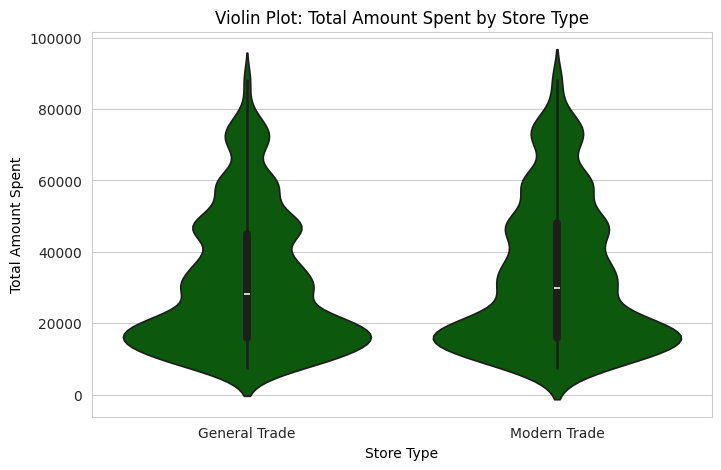

In [31]:
# 17. Relationship between Store Type and Total Amount Spent using Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(x="type", y="total_amount", data=df, palette=[custom_palette[0]])
plt.title("Violin Plot: Total Amount Spent by Store Type", color=custom_palette[1])
plt.xlabel("Store Type", color=custom_palette[1])
plt.ylabel("Total Amount Spent", color=custom_palette[1])
plt.show()

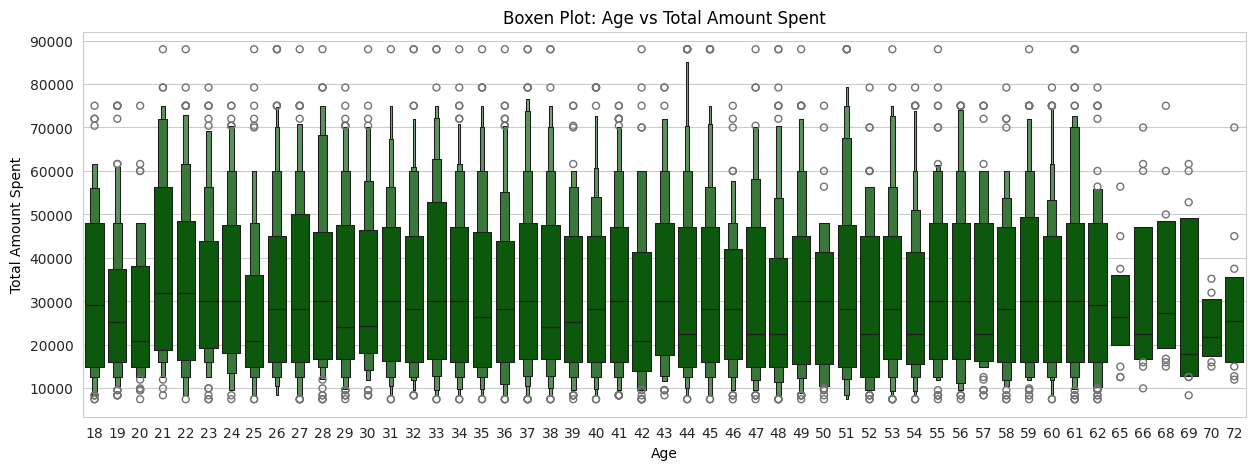

In [32]:
# 19. Relationship between Age and Total Amount Spent using Boxen Plot
plt.figure(figsize=(15, 5))
sns.boxenplot(x=df['age'], y=df['total_amount'], palette=[custom_palette[0]])
plt.title("Boxen Plot: Age vs Total Amount Spent", color=custom_palette[1])
plt.xlabel("Age", color=custom_palette[1])
plt.ylabel("Total Amount Spent", color=custom_palette[1])
plt.show()

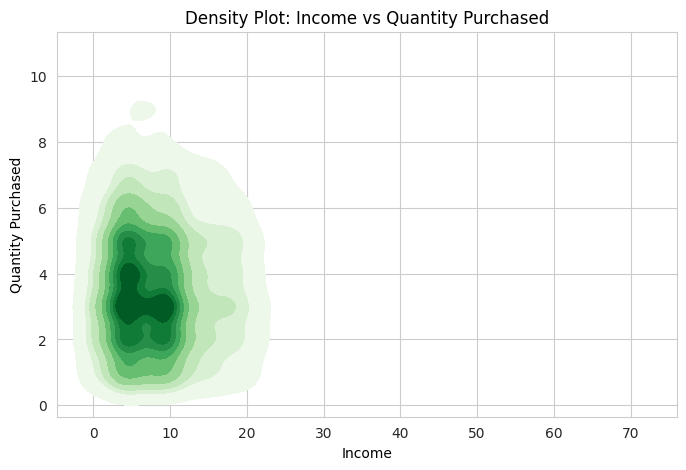

In [33]:
# 19. Relationship between Income and Quantity Purchased using KDE Contour Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(x=df['income'], y=df['qty'], fill=True, cmap="Greens")
plt.title("Density Plot: Income vs Quantity Purchased", color=custom_palette[1])
plt.xlabel("Income", color=custom_palette[1])
plt.ylabel("Quantity Purchased", color=custom_palette[1])
plt.show()

## Mlutivariate Analysis

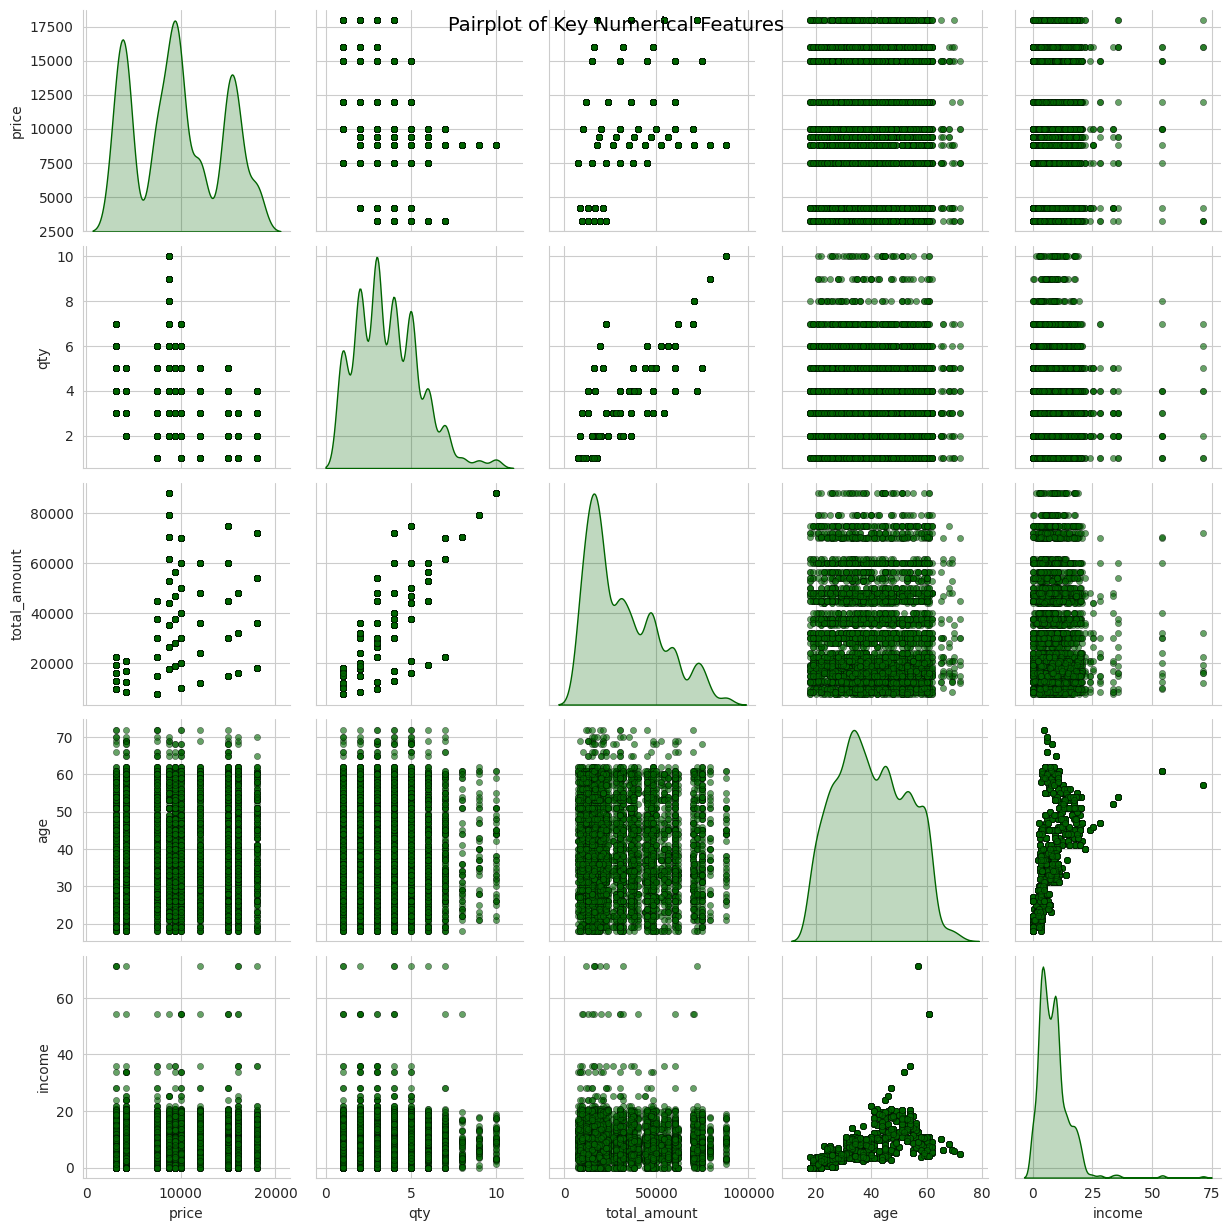

In [34]:
# 1. Pairplot of Key Numerical Features
num_features = ['price', 'qty', 'total_amount', 'age', 'income']
sns.pairplot(df[num_features], diag_kind="kde", plot_kws={'alpha':0.6, 's':20, 'edgecolor':'k'})
plt.suptitle("Pairplot of Key Numerical Features", fontsize=14, color=custom_palette[1])
plt.show()

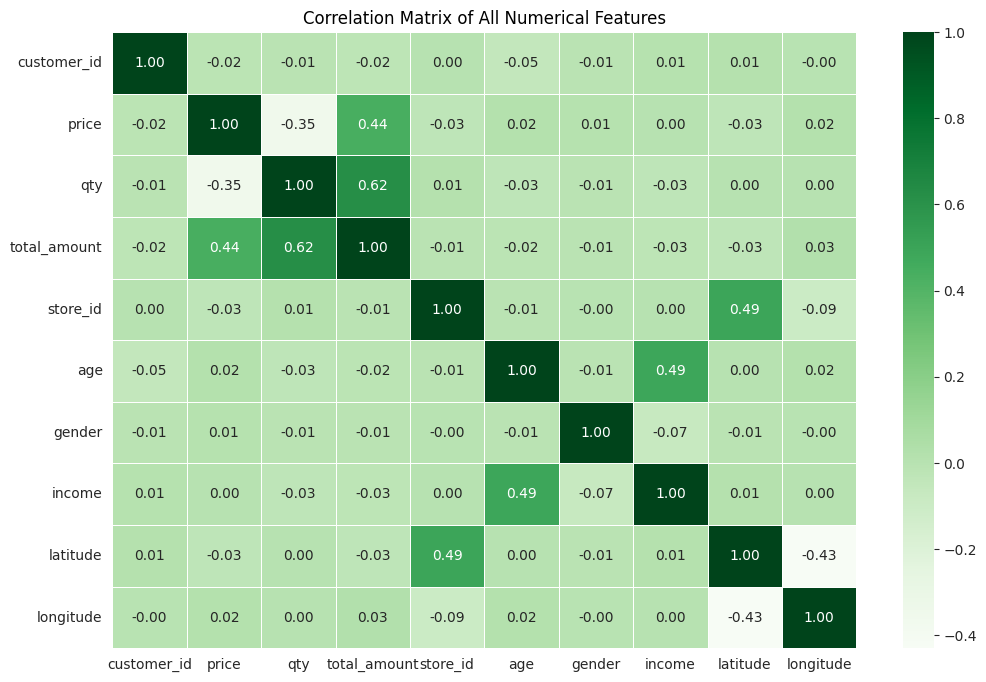

In [35]:
# Select only numerical features
numerical_features = df.select_dtypes(include=['number'])

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of All Numerical Features", color=custom_palette[1])
plt.show()

# RFM Analysis

In [36]:
# Hitung RFM
rfm = df.groupby('customer_id').agg(
    Recency=('transaction_date', lambda x: (pd.Timestamp.today() - x.max()).days),
    Frequency=('transaction_id', 'nunique'),
    Monetary=('total_amount', 'sum')  # Total transaksi
).reset_index()

In [37]:
# Hitung AOV (Average Order Value)
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']

In [38]:
rfm.head()

,customer_id,Recency,Frequency,Monetary,AOV
0,1,816,17,623300,36664.705882
1,2,815,13,392300,30176.923077
2,3,800,15,446200,29746.666667
3,4,795,10,302500,30250.000000
4,5,818,7,268600,38371.428571


## RFM Quartiles

In [39]:
# RFM Quartile, M >> AOV

rfm['Recency_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=[1, 2, 3, 4])  # Semakin rendah Recency semakin baik
rfm['Frequency_Quartile'] = pd.qcut(rfm['Frequency'], 4, labels=[4, 3, 2, 1])  # Semakin tinggi Frequency semakin baik
rfm['AOV_Quartile'] = pd.qcut(rfm['AOV'], 4, labels=[4, 3, 2, 1])  # Semakin tinggi AOV semakin baik


In [40]:
rfm.head(10)

,customer_id,Recency,Frequency,Monetary,AOV,Recency_Quartile,Frequency_Quartile,AOV_Quartile
0,1,816,17,623300,36664.705882,3,1,1
1,2,815,13,392300,30176.923077,3,2,3
2,3,800,15,446200,29746.666667,2,1,3
3,4,795,10,302500,30250.000000,1,3,3
4,5,818,7,268600,38371.428571,3,4,1
5,6,811,10,459100,45910.000000,2,3,1
6,7,801,17,498800,29341.176471,2,1,3
7,8,845,14,542100,38721.428571,4,2,1
8,9,794,10,349200,34920.000000,1,3,2
9,10,792,14,478000,34142.857143,1,2,2


# Customer Segmentation

In [41]:
def segment_customer(row):
    r, f, m = row['Recency_Quartile'], row['Frequency_Quartile'], row['AOV_Quartile']

    # 1. Best Customer
    if r == 1 and f == 1 and m == 1:
        return 'Best Customer'
    # 2. Potential Customers
    elif (r == 1 and f == 1 and m == 2) or \
         (r == 1 and f == 2 and m == 2) or \
         (r == 2 and f == 1 and m == 1) or \
         (r == 2 and f == 2 and m == 2):
        return 'Potential Customers'
    # 3. Lost Cheap
    elif r == 4 and f == 4 and m in [4, 3]:
        return 'Lost Cheap'
    # 4. Big Spender
    elif m == 1:
        return 'Big Spender'
    # 5. Loyal Customers
    elif f == 1:
        return 'Loyal Customers'
    # 6. Others/Recent Shopper
    elif (r == 1 or r == 2):
        return 'Others/Recent Shopper'
    # 7. Almost Lost
    elif r == 3:
        return 'Almost Lost'
    # 8. Lost Customers
    elif r == 4:
        return 'Lost Customers'

    # Default: Segmen tidak dikenal
    else:
        return 'Others'

# Tambahkan kolom segmentasi ke DataFrame
rfm['Segment'] = rfm.apply(segment_customer, axis=1)


In [42]:
# Tambahkan kolom RFM Score sebagai kombinasi tiga angka
rfm['RFM_Score'] = (
    rfm['Recency_Quartile'].astype(str) +
    rfm['Frequency_Quartile'].astype(str) +
    rfm['AOV_Quartile'].astype(str)
)

In [43]:
rfm.head(10)

,customer_id,Recency,Frequency,Monetary,AOV,Recency_Quartile,Frequency_Quartile,AOV_Quartile,Segment,RFM_Score
0,1,816,17,623300,36664.705882,3,1,1,Big Spender,311
1,2,815,13,392300,30176.923077,3,2,3,Almost Lost,323
2,3,800,15,446200,29746.666667,2,1,3,Loyal Customers,213
3,4,795,10,302500,30250.000000,1,3,3,Others/Recent Shopper,133
4,5,818,7,268600,38371.428571,3,4,1,Big Spender,341
5,6,811,10,459100,45910.000000,2,3,1,Big Spender,231
6,7,801,17,498800,29341.176471,2,1,3,Loyal Customers,213
7,8,845,14,542100,38721.428571,4,2,1,Big Spender,421
8,9,794,10,349200,34920.000000,1,3,2,Others/Recent Shopper,132
9,10,792,14,478000,34142.857143,1,2,2,Potential Customers,122


In [44]:
#Save RFM to Excel
rfm.to_excel('KalbeFarma_RFM_Analysis.xlsx', index=False)

# Visualization of Segmentation

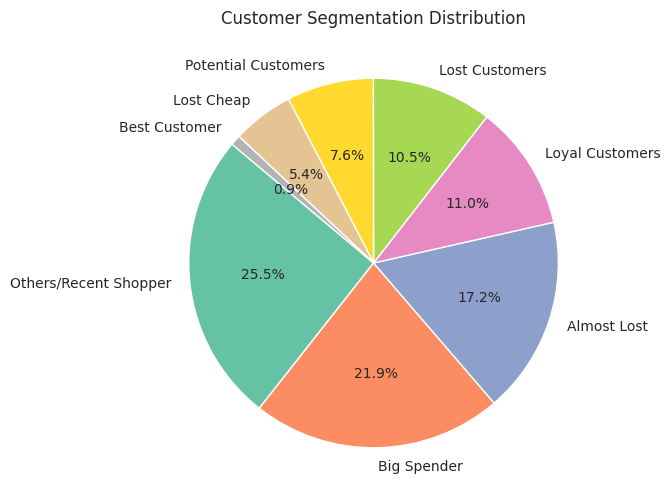

In [45]:
# 1. Pie Chart - Customer Segment Distribution
plt.figure(figsize=(10, 6))
segment_counts = rfm['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Customer Segmentation Distribution')
plt.show()

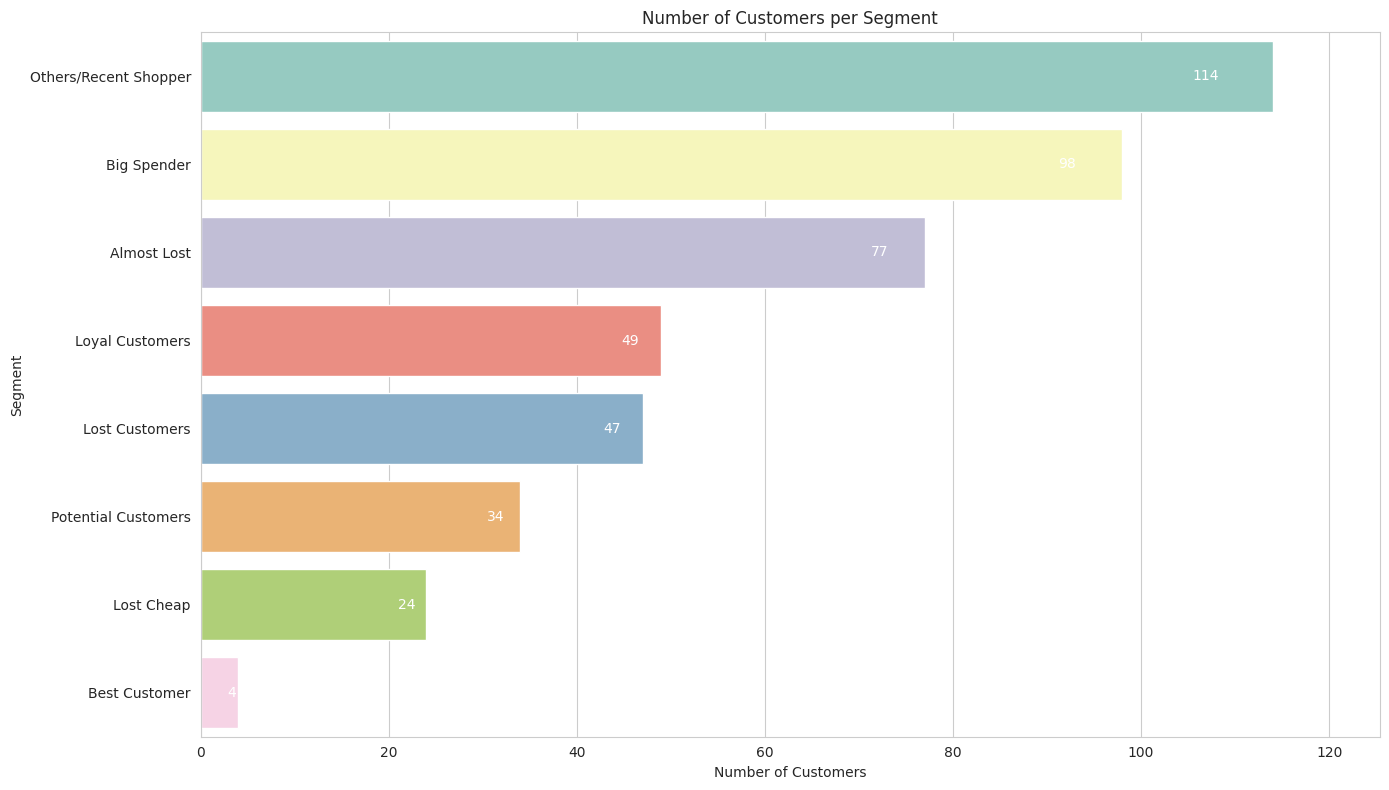

In [46]:
# 2. Bar Chart - Number of Customers per Segment
plt.figure(figsize=(14, 8))
segment_counts = rfm['Segment'].value_counts()

# Plot bar chart
ax = sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='Set3')

plt.title('Number of Customers per Segment')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')

# Add labels inside bars
for i, v in enumerate(segment_counts.values):
    ax.text(v - v * 0.05, i, f'{v}',  # Position slightly left inside the bar
            va='center', ha='right', fontsize=10, color='white')  # White label for contrast

plt.xlim(0, segment_counts.max() * 1.1)  # Slightly increase frame to add space
plt.tight_layout()
plt.show()

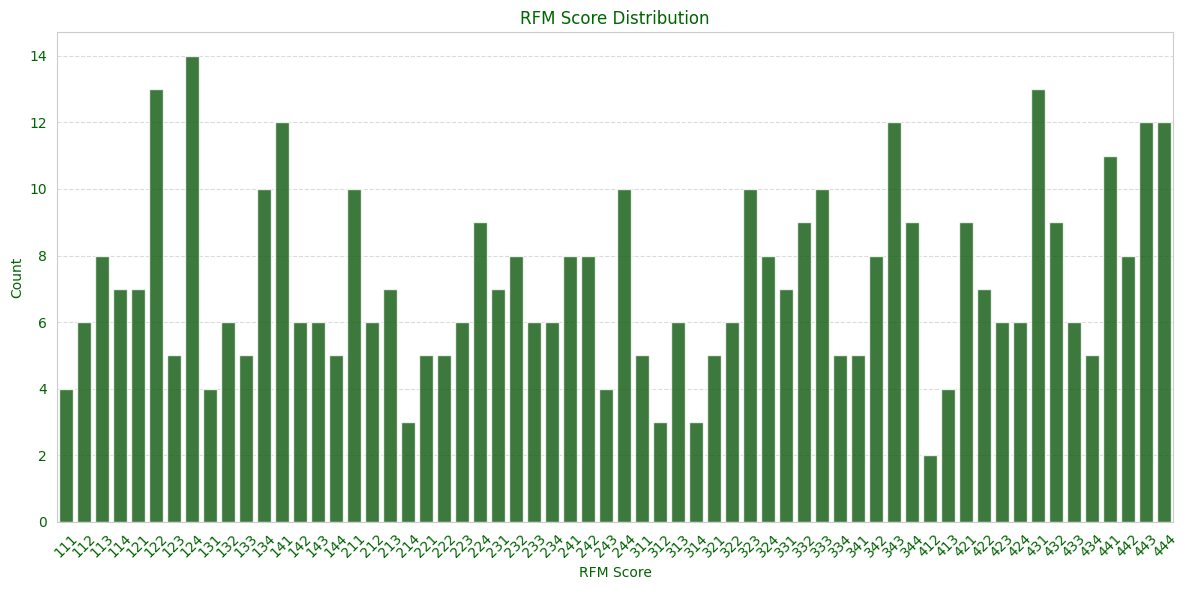

In [47]:
#3. Define a single-tone green color for gradient effect
single_green = "#006400"  # Dark Green

# Plot RFM Score Distribution
plt.figure(figsize=(12, 6))
rfm_score_counts = rfm['RFM_Score'].value_counts().reset_index()
rfm_score_counts.columns = ['RFM_Score', 'Count']
rfm_score_counts = rfm_score_counts.sort_values(by='RFM_Score')  # Sort by RFM Score for clarity

sns.barplot(data=rfm_score_counts, x='RFM_Score', y='Count', color=single_green, alpha=0.8)
plt.title('RFM Score Distribution', color=single_green)
plt.xlabel('RFM Score', color=single_green)
plt.ylabel('Count', color=single_green)
plt.xticks(rotation=45, color=single_green)  # Rotate x-axis labels for better readability
plt.yticks(color=single_green)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


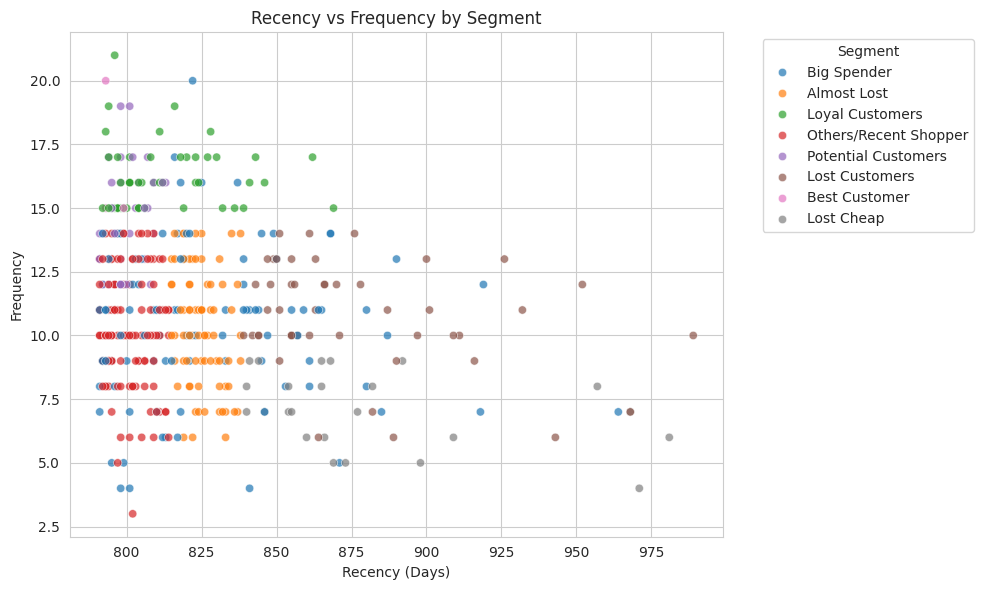

In [48]:
# 4. Scatter Plot - Recency vs Frequency by Segment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='tab10', alpha=0.7)
plt.title('Recency vs Frequency by Segment')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Ensure AOV_Quartile is numeric
rfm['AOV_Quartile'] = pd.to_numeric(rfm['AOV_Quartile'], errors='coerce')

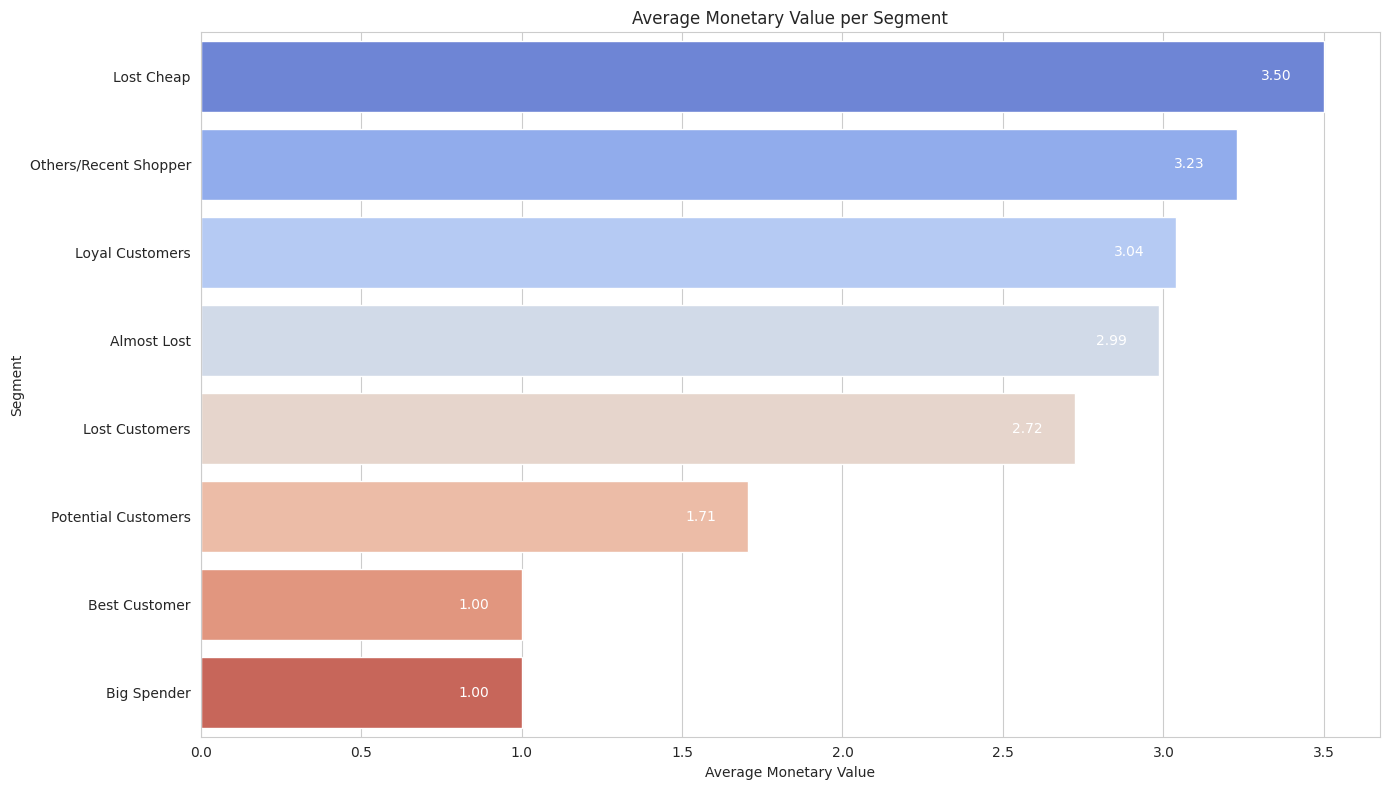

In [49]:
# 5. Bar Chart - Average Monetary Value per Segment
plt.figure(figsize=(14, 8))
monetary_segment = rfm.groupby('Segment')['AOV_Quartile'].mean().sort_values(ascending=False)

# Plot bar chart
ax = sns.barplot(x=monetary_segment.values, y=monetary_segment.index, palette='coolwarm')

plt.title('Average Monetary Value per Segment')
plt.xlabel('Average Monetary Value')
plt.ylabel('Segment')

# Add labels inside the bars
for i, v in enumerate(monetary_segment.values):
    ax.text(v - 0.1, i, f'{v:.2f}',  # Position slightly left inside the bar
            va='center', ha='right', fontsize=10, color='white')  # White label for contrast

plt.tight_layout()
plt.show()




In [50]:
# Merge RFM table with original DataFrame
df_merged = df.merge(rfm, on='customer_id', how='left')

# Save the merged DataFrame to an Excel file
output_file = "Kalbe_Farma_RFM_Analysis_with_Segmentation.xlsx"
df_merged.to_excel(output_file, index=False)

print(f"File has been saved to: {output_file}")

File has been saved to: Kalbe_Farma_RFM_Analysis_with_Segmentation.xlsx


In [51]:
df_merged.head()

,transaction_id,customer_id,transaction_date,product_id,price,qty,total_amount,store_id,age,gender,...,longitude,Recency,Frequency,Monetary,AOV,Recency_Quartile,Frequency_Quartile,AOV_Quartile,Segment,RFM_Score
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,...,104.756554,793,9,252600,28066.666667,1,4,4,Others/Recent Shopper,144
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,...,106.816666,952,12,318600,26550.000000,4,2,4,Lost Customers,424
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,...,110.416664,828,12,302200,25183.333333,3,2,4,Almost Lost,324
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,...,110.416664,797,15,406200,27080.000000,1,1,4,Loyal Customers,114
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,...,110.416664,798,11,311100,28281.818182,1,3,4,Others/Recent Shopper,134
